## Observations and Insights 

In [13]:
# Import and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Import data files

mouse_metadata_path = "/Users/minoperic/Data Analytics/matplotlib-challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/minoperic/Data Analytics/matplotlib-challenge/Pymaceuticals/data/Study_results.csv"

# Read .csv files

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [14]:
# Preview 'mouse_metadata'

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [15]:
# Preview 'study_results'

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [16]:
# Combine into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Preview combined DataFrame
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.

len(combined_df)

1893

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    # Duplicate = 'Mouse G989'

combined_df.drop(combined_df[combined_df['Mouse ID']== 'g989'].index, inplace=True)

In [20]:
# Confirm drop of mouse ID 'g989'

len(combined_df)

1880

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumorvolume_mean = combined_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumorvolume_median = combined_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumorvolume_std = combined_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumorvolume_var = combined_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumorvolume_sem = combined_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumorstatisticssummary_df = pd.DataFrame(tumorvolume_mean)
tumorstatisticssummary_df['Tumor Volume Median'] = tumorvolume_median
tumorstatisticssummary_df['Tumor Volume Standard Deviation'] = tumorvolume_std
tumorstatisticssummary_df['Tumor Volume Variance'] = tumorvolume_var
tumorstatisticssummary_df['Tumor Volume Standard Error'] = tumorvolume_sem

# Rename mean column
tumorstatisticssummary_df = tumorstatisticssummary_df.rename(columns = {
    'Tumor Volume (mm3)': 'Tumor Volume Mean',
})

# Show summary table
tumorstatisticssummary_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Standard Deviation,Tumor Volume Variance,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [35]:
# Using the aggregation method, produce the same summary statistics in a single line

tumorstatisticssummary_agg_df = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumorstatisticssummary_agg_df = tumorstatisticssummary_df.rename(columns = {
    'mean': 'Tumor Volume Mean', 
    'median': 'Tumor Volume Median', 
    'var': 'Tumor Volume Variance', 
    'std': 'Tumor Volume STD', 
    'sem': 'Tumor Volume STD'
})
tumorstatisticssummary_agg_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Standard Deviation,Tumor Volume Variance,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Count of Unique Mice')

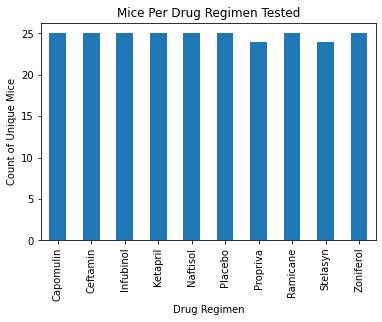

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

pandas_bp_data = combined_df.groupby('Drug Regimen').nunique()['Mouse ID']
pandas_bp = pandas_bp_data.plot.bar(title='Mice Per Drug Regimen Tested')

pandas_bp.set_xlabel('Drug Regimen')
pandas_bp.set_ylabel('Count of Unique Mice')

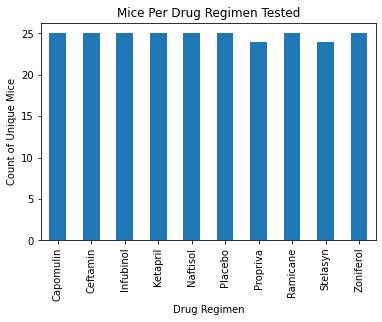

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

pyplot_bp_data = combined_df.groupby('Drug Regimen').nunique()['Mouse ID']
pyplot_bp_df = pd.DataFrame(pyplot_bp_data)
pyplot_bp_df.plot.bar(legend=False)
plt.title('Mice Per Drug Regimen Tested')
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Unique Mice')
plt.show()

<AxesSubplot:title={'center':'Gender Distribution of Mice in Study'}, ylabel='Mouse ID'>

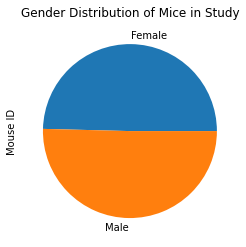

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pandas_pie_data = combined_df.groupby('Sex').nunique()['Mouse ID']
pandas_pie_data.plot.pie(title = "Gender Distribution of Mice in Study")

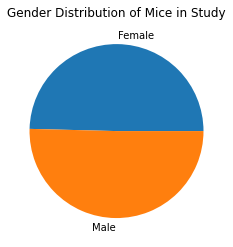

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pyplot_pie_data = combined_df.groupby('Sex').nunique()['Mouse ID']
pyplot_pie_df = pd.DataFrame(pyplot_pie_data)
plt.pie(pyplot_pie_data, labels = pyplot_pie_data.index)
plt.title('Gender Distribution of Mice in Study')
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = combined_df.groupby('Mouse ID').max()['Timepoint']
final_timepoint_df = pd.DataFrame(final_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse_study_df = pd.merge(final_timepoint_df, combined_df, on=('Mouse ID','Timepoint'))
merged_mouse_study_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

   # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in merged_mouse_study_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_capomulin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ramicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_infubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_ceftamin.append(row['Tumor Volume (mm3)'])
    
    # add subset
    
#created a data frame with the tumor data of the drugs listed.
treatment_df = pd.DataFrame({"Capomulin": tumor_capomulin,
                       treatments[1]: tumor_ramicane,
                       treatments[2]: tumor_infubinol,
                       treatments[3]: tumor_ceftamin
                       })
    
# Determine outliers using upper and lower bounds
treatment_df_max = treatment_df.max()
treatment_df_min = treatment_df.min()

treatment_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [64]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
quart_capomulin = treatment_df[treatments[0]].quantile([.25, .5, .75])
low_capomulin = quart_capomulin[.25]
med_capomulin = quart_capomulin[.5]
up_capomulin = quart_capomulin[.75]
iqr_capomulin = up_capomulin - low_capomulin
lowb_capomulin = low_capomulin - (1.5*iqr_capomulin)
upb_capomulin = up_capomulin + (1.5*iqr_capomulin)
min_capomulin = treatment_df[treatments[0]].min()
max_capomulin = treatment_df[treatments[0]].max()

quart_ramicane = treatment_df[treatments[1]].quantile([.25, .5, .75])
low_ramicane = quart_ramicane[.25]
med_ramicane = quart_ramicane[.5]
up_ramicane = quart_ramicane[.75]
iqr_ramicane = up_ramicane - low_ramicane
lowb_ramicane = low_ramicane - (1.5*iqr_ramicane)
upb_ramicane = up_ramicane + (1.5*iqr_ramicane)
min_ramicane = treatment_df[treatments[1]].min()
max_ramicane = treatment_df[treatments[1]].max()

quart_infubinol = treatment_df[treatments[2]].quantile([.25, .5, .75])
low_infubinol = quart_infubinol[.25]
med_infubinol = quart_infubinol[.5]
up_infubinol = quart_infubinol[.75]
iqr_infubinol = up_infubinol - low_infubinol
lowb_infubinol = low_infubinol - (1.5*iqr_infubinol)
upb_infubinol = up_infubinol + (1.5*iqr_infubinol)
min_infubinol = treatment_df[treatments[2]].min()
max_infubinol = treatment_df[treatments[2]].max()

quart_ceftamin = treatment_df[treatments[3]].quantile([.25, .5, .75])
low_ceftamin = quart_ceftamin[.25]
med_ceftamin = quart_ceftamin[.5]
up_ceftamin = quart_ceftamin[.75]
iqr_ceftamin = up_ceftamin - low_ceftamin
lowb_ceftamin = low_ceftamin - (1.5*iqr_ceftamin)
upb_ceftamin = up_ceftamin + (1.5*iqr_ceftamin)
min_ceftamin = treatment_df[treatments[3]].min()
max_ceftamin = treatment_df[treatments[3]].max()

outliers = pd.DataFrame({'Drug': treatments,
                         'Lower Quartile':[low_capomulin, low_ramicane, low_infubinol, low_ceftamin],
                         'Upper Quartile':[up_capomulin, up_ramicane, up_infubinol, up_ceftamin],
                         'IQR':[iqr_capomulin, iqr_ramicane, iqr_infubinol, iqr_ceftamin],
                         'Median':[med_capomulin, med_ramicane, med_infubinol, med_ceftamin],
                        'Upper Bound': [upb_capomulin, upb_ramicane, upb_infubinol, upb_ceftamin],
                        'Lower Bound': [lowb_capomulin, lowb_ramicane, lowb_infubinol, lowb_ceftamin],
                        'Min': [min_capomulin, min_ramicane, min_infubinol, min_ceftamin],
                        'Max': [max_capomulin, max_ramicane, max_infubinol, max_ceftamin]
                         
                        })
outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Min,Max
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,23.343598,47.685963
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,45.000000,68.923185
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,36.321346,72.226731
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,22.050126,45.220869


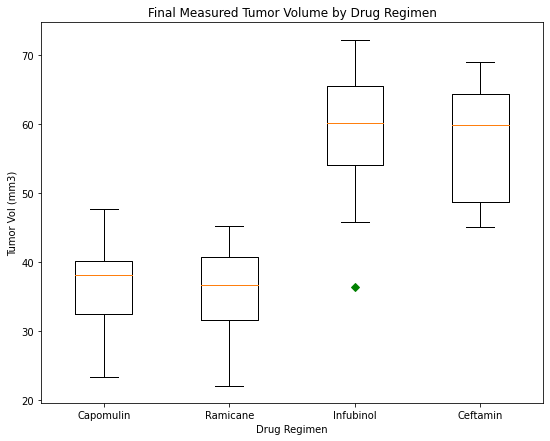

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot_list = [treatment_df[treatments[0]],
                treatment_df[treatments[1]],
                treatment_df[treatments[2]],
                treatment_df[treatments[3]]
               ]

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final Measured Tumor Volume by Drug Regimen') 
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Vol (mm3)') 

# used ax.boxplot function and ran the parameter boxplot_list to create the boxplot

ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments) 
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse B128 Tumor Over Time on Capomulin Regimen')

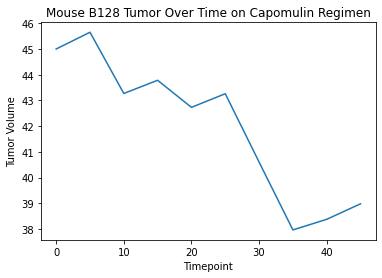

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

    # Capomulin-treated mouse = 'Mouse b128'

mouseb128_df = combined_df.loc[combined_df["Mouse ID"]=="b128"]
mouseb128_df

timepoint = mouseb128_df['Timepoint']
tumorvolume = mouseb128_df['Tumor Volume (mm3)']

plt.plot(timepoint, tumorvolume, label = "tumor volume")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Mouse B128 Tumor Over Time on Capomulin Regimen')

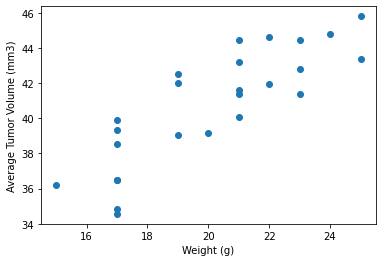

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [69]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()
capomulin_average

## Correlation and Regression

In [70]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [74]:
# Calculate linear regression model

linregmodel = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
linregmodel

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)

In [75]:
# Define slope and intercept for regression line

slope = 0.9544396890241045
intercept = 21.552160532685015

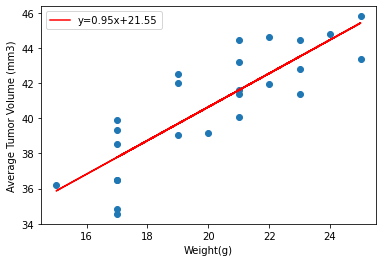

In [78]:
# Plotting regression line on scatter plot

regression_line = slope *(capomulin_average['Weight (g)']) + intercept
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'], regression_line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Include legend
plt.legend()
plt.savefig('linearregression')
plt.show()